# <b><h1>**🚲🚴‍♂️YULU_Bikes - Business Case Study🚴‍♂️🚲**</h1>
---

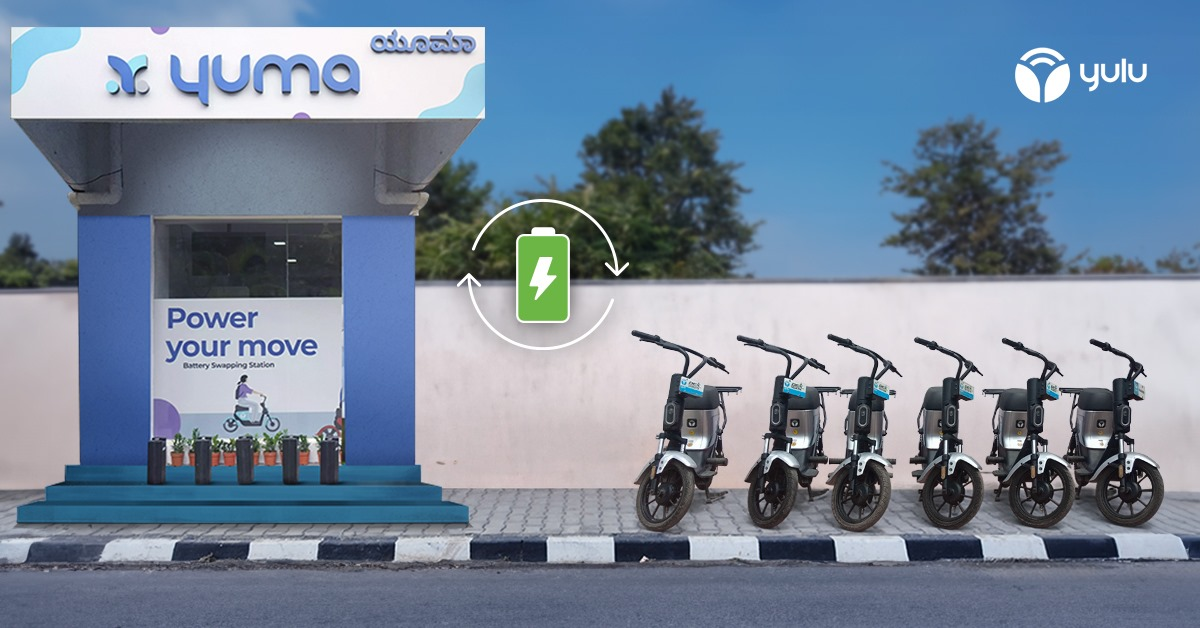

<h1><b>1. Define the Problem Statement, Import the required Libraries and perform
Exploratory Data Analysis.</b><br>

In [ ]:
# Importing the Libraries:
import pandas as pd
import numpy as np
import scipy.stats as stats
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from scipy.stats import ttest_ind,f_oneway, levene, kruskal, shapiro, chi2_contingency
from statsmodels.graphics.gofplots import qqplot

In [ ]:
# Upload the File
from google.colab import files
uploaded = files.upload()

Saving bike_sharing.csv to bike_sharing.csv


In [ ]:
# Loading Yuno Data from CSV File
Data = pd.read_csv('bike_sharing.csv')

In [ ]:
# Creating a Copy of the Bike Sharing Data
df = Data.copy()

In [ ]:
# Previewing the First Five Rows of the DataFrame
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Getting the Dimensions of the DataFrame
df.shape

(10886, 12)

In [ ]:
# Displaying DataFrame Summary Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# Checking for Missing Values in the DataFrame
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
# Listing Column Names in the DataFrame
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
# Counting Duplicate Rows in the DataFrame
df.duplicated().sum()

0

In [ ]:
# Counting Unique Values in Each Column of the DataFrame
df.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


In [ ]:
# Counting Unique Values in Each Column of the DataFrame
df.nunique()# Statistical Summary of the DataFrame
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Transposed Statistical Summary of the DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [ ]:
# Transposed Statistical Summary of Categorical Columns in the DataFrame
df.describe(include = 'object').T

,count,unique,top,freq
datetime,10886,10886,2011-01-01 00:00:00,1


In [ ]:
# Displaying the Data Types of Each Column in the DataFrame
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


<h3>
Data Cleaning and Transformation: Converting Datetime, <br>Mapping Values, and Binning Variables<

In [ ]:
# Mapping Numeric Codes to Descriptive Labels for Seasons, Holidays, Working Days, and Weather Conditions:
df['Season'] = df['season'].map({1 : 'Spring', 2 : 'Summer', 3 : 'Fall', 4 : 'Winter'})
df['Holiday'] = df['holiday'].map({0 : 'Not Holiday', 1 : 'Holiday'})
df['Workingday'] = df['workingday'].map({0 : 'Weekends', 1 : 'Weekdays'})
df['Weather'] = df['weather'].map({1 : 'Partly Cloudy', 2 : 'Misty or Overcast', 3 : 'Light Precipitation', 4 : 'Stormy and Foggy'})

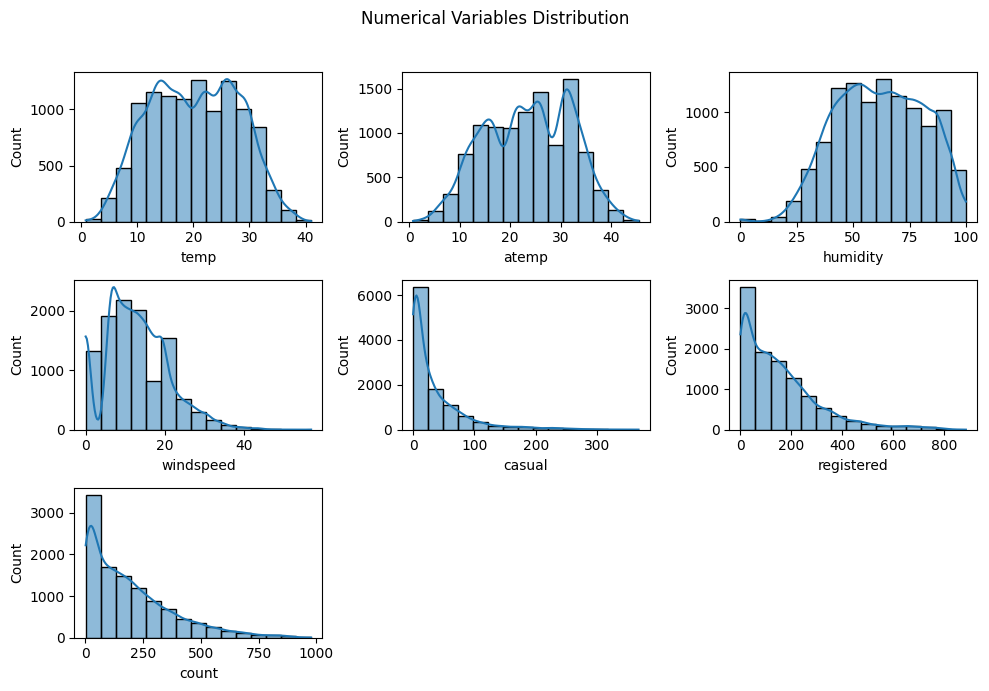

In [ ]:
# For Numerical Variables Distribution features use Histogram:
# Create subplots for each numerical column
Numerical_Columns = ['temp', 'atemp', 'humidity',  'windspeed','casual', 'registered', 'count']
plt.figure(figsize=(10, 7))
plt.suptitle('Numerical Variables Distribution')

# Plot each numerical column
for i, column in enumerate(Numerical_Columns, 1):
  plt.subplot(3, 3, i)
  sns.histplot(df[column], bins=15, kde=True)
  plt.grid(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

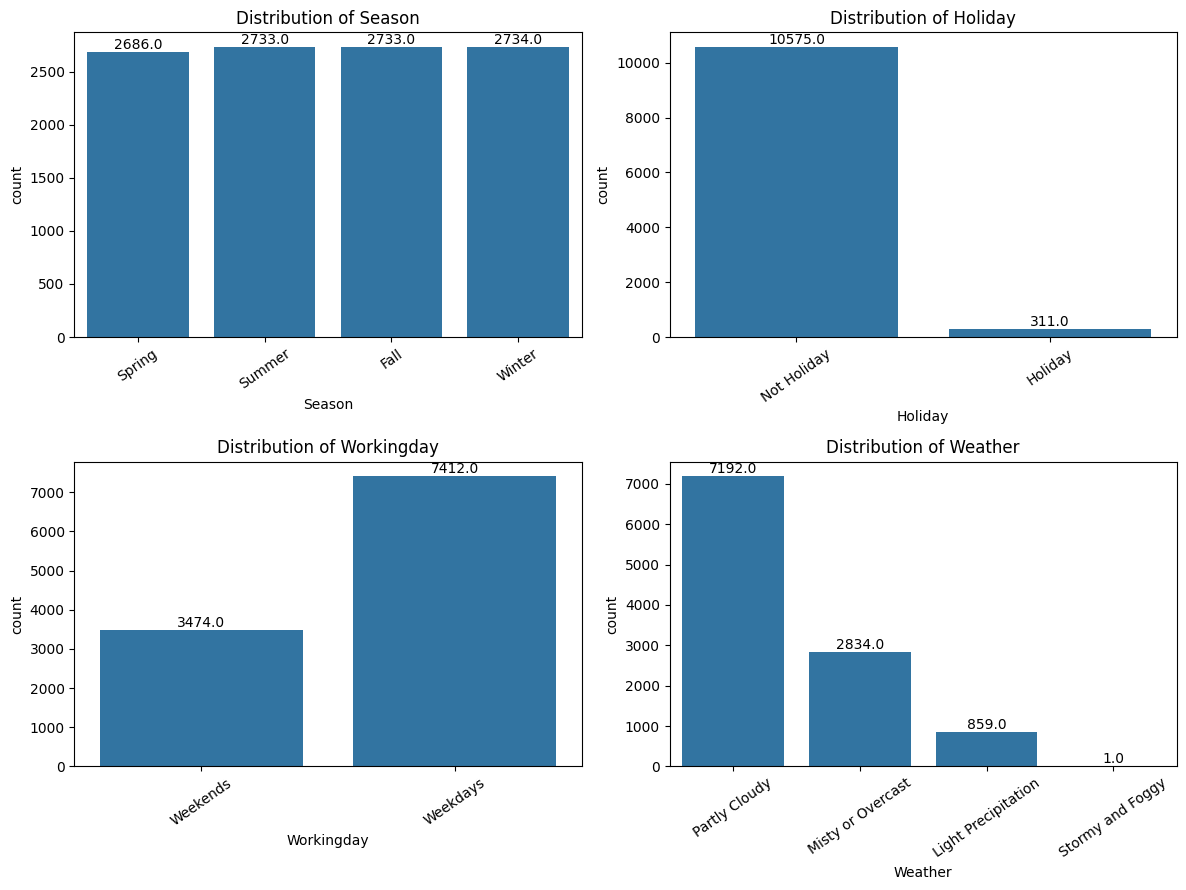

In [ ]:
# Count plots for categorical columns:
Categorical_Columns = ['Season', 'Holiday', 'Workingday', 'Weather']
plt.figure(figsize=(12, 9))

for i, col in enumerate(Categorical_Columns, 1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")

    # Adding bar labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')
    plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

<h2>Check for Outliers and deal with them accordingly.</h1>

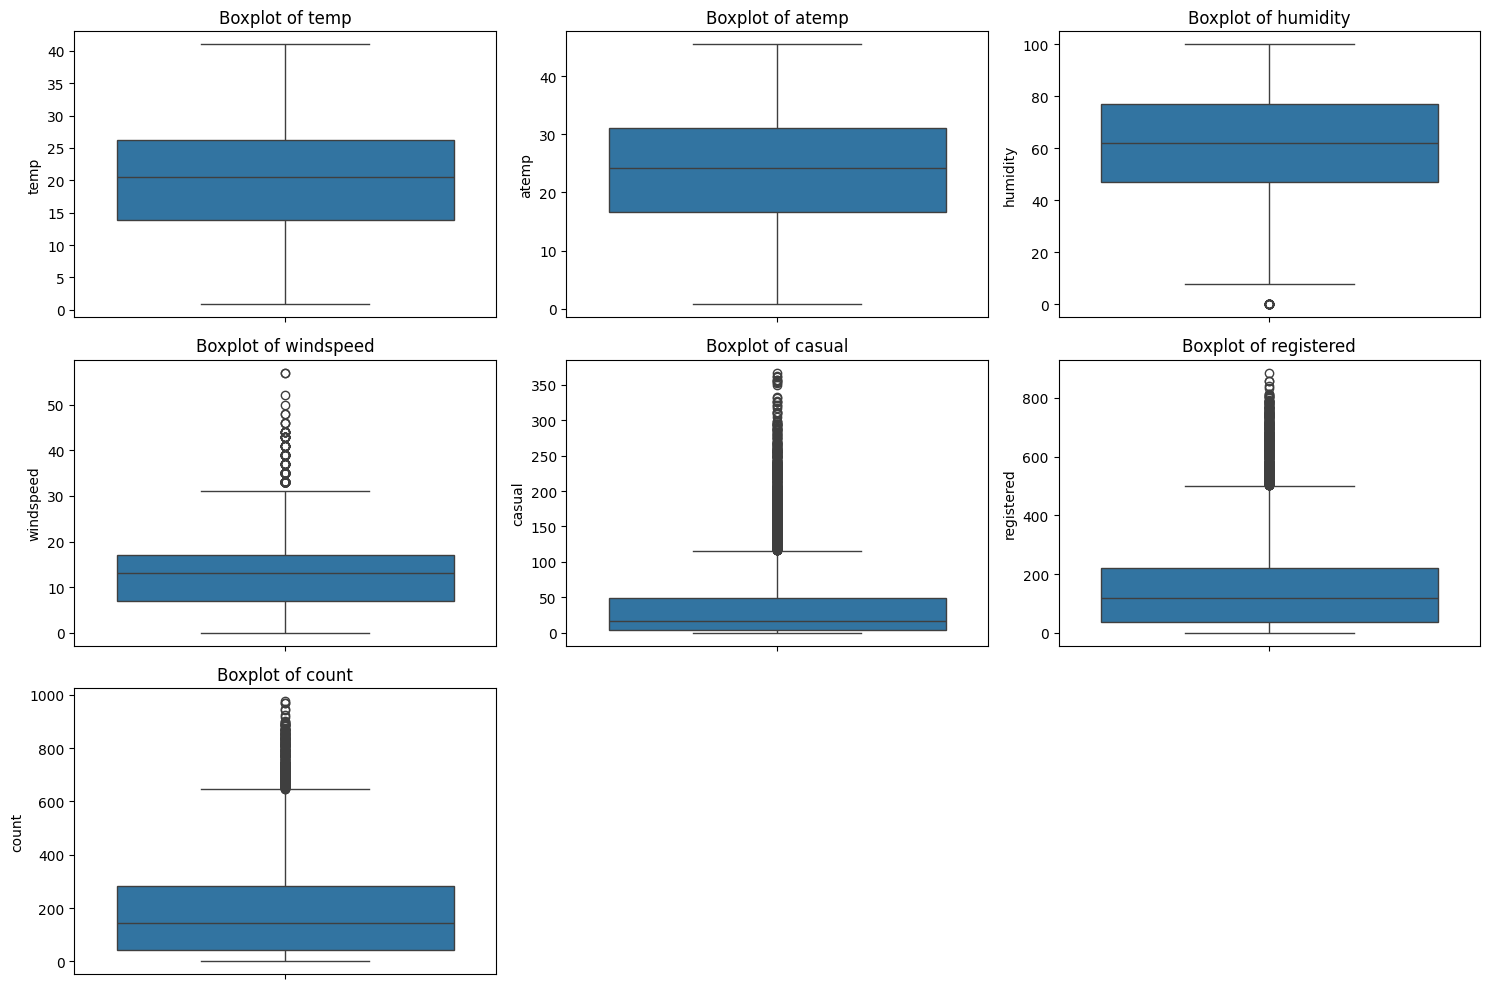

In [ ]:
# Select numeric columns for analysis
numeric_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Plot boxplots for all numeric columns to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
# Function to calculate IQR and identify outlier bounds
def calculate_iqr_bounds(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

outlier_bounds = {col: calculate_iqr_bounds(df, col) for col in numeric_columns}
outlier_bounds

{'temp': (-4.51, 44.69),
 'atemp': (-4.927500000000002, 52.6525),
 'humidity': (2.0, 122.0),
 'windspeed': (-7.993100000000002, 31.992500000000003),
 'casual': (-63.5, 116.5),
 'registered': (-243.0, 501.0),
 'count': (-321.0, 647.0)}

<b><h1>Handling Outliers</h1>

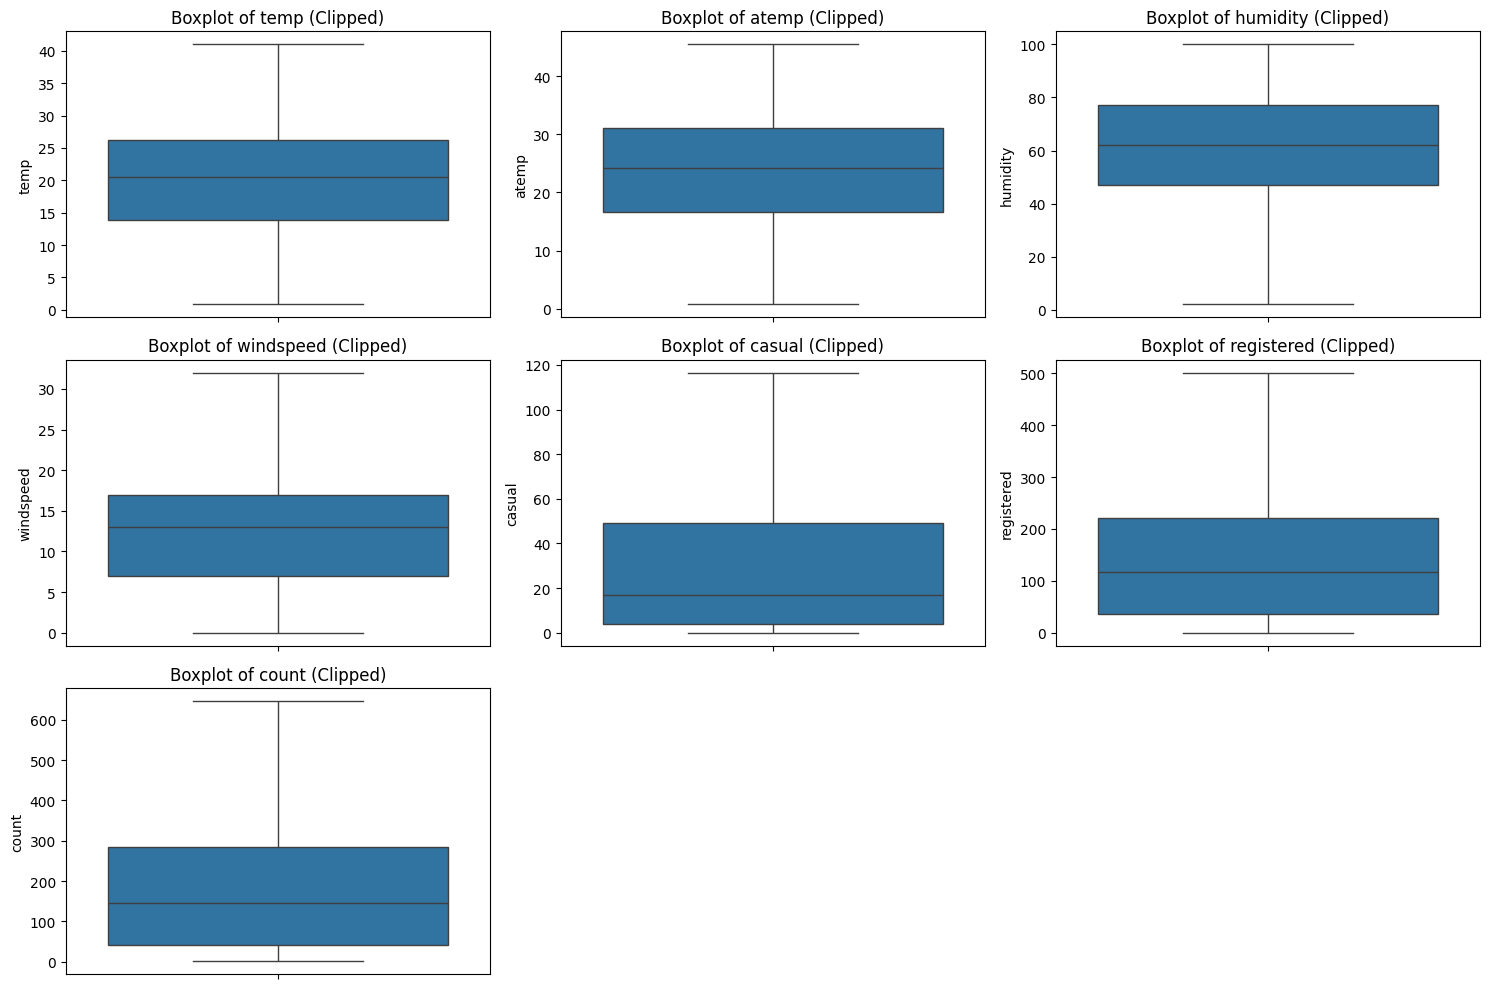

In [ ]:
# Clip outliers to their respective bounds
df_clipped = df.copy()
for col, (lower, upper) in outlier_bounds.items():
    df_clipped[col] = np.clip(df_clipped[col], lower, upper)

# Verify the changes by plotting boxplots again
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_clipped, y=col)
    plt.title(f'Boxplot of {col} (Clipped)')
plt.tight_layout()
plt.show()

<h1><b>Insights</b><h1>
<h3>Temperature and Apparent Temperature (temp, atemp):<h3>

*   The data suggests a reasonable range of values with no significant outliers outside expected bounds.
*   Weather conditions (e.g., seasonal variations) may influence these variables.

<h3>Humidity (humidity):</h3>

*   Some extreme values were detected but are within plausible environmental ranges (e.g., near-zero or extremely high humidity).
*   Proper handling ensures no unusual readings will bias the analysis.

<h3>Windspeed (windspeed):</h3>

*   Outliers indicated unusually high wind speeds. Clipping these values helps reduce their disproportionate effect on models.

<h3>Casual and Registered Users (casual, registered):</h3>

*   These columns had significant outliers, likely from peak days of usage or unexpected events (e.g., holidays, promotions).
*   Clipping reduces extreme impacts while maintaining data integrity for normal operations.

<h3>Total Count (count):</h3>

*   Outliers suggest occasional surges in bike rentals. These may coincide with specific weather conditions, events, or times of the year.





<h1><b>Recommendations:</b><h1>
<h3>For Predictive Modeling:<h3>

*   After clipping outliers, the data is more suitable for machine learning models without bias from extreme values.
*   Use variables like temp, humidity, and windspeed as features to predict bike usage.

<h3>Operational Adjustments:</h3>


*   High usage days should be analyzed separately to plan for adequate resources like bike availability and maintenance.
*   Look deeper into casual vs. registered users to identify trends, such as whether promotions or events drive spikes in usage.

<h3>Exploration of External Factors:</h3>


*   Study correlations between weather conditions and bike usage trends to optimize operations (e.g., special offers during favorable conditions).
*   Investigate how events, holidays, and weekdays impact user behavior to design better marketing strategies.

<h3>Regular Data Monitoring:</h3>


*   Continuously monitor for new outliers in future data collection and apply similar handling strategies.
*   Use dashboards or tools to visualize usage trends and environmental impacts in real time.

<h3>Segment Analysis:</h3>

*   Group users based on weather conditions (Weather), seasons (Season), or days (Holiday, Workingday) to uncover specific patterns.
*   Tailor services (e.g., discounts or subscriptions) to attract casual users and retain registered ones.




<br><br><h1>2. Try establishing a Relationship between the Dependent and Independent Variables.


In [ ]:
Continous_Vars = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
Continous_Vars.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


In [ ]:
#Heatmap of Correlation Table
correlation_matrix = Continous_Vars.corr()
threshold = 0.85
high_corr_vars = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_vars.add(colname)

print(f"Highly correlated variables: {high_corr_vars}")
df_reduced = df.drop(columns=high_corr_vars)

Highly correlated variables: {'atemp', 'count'}


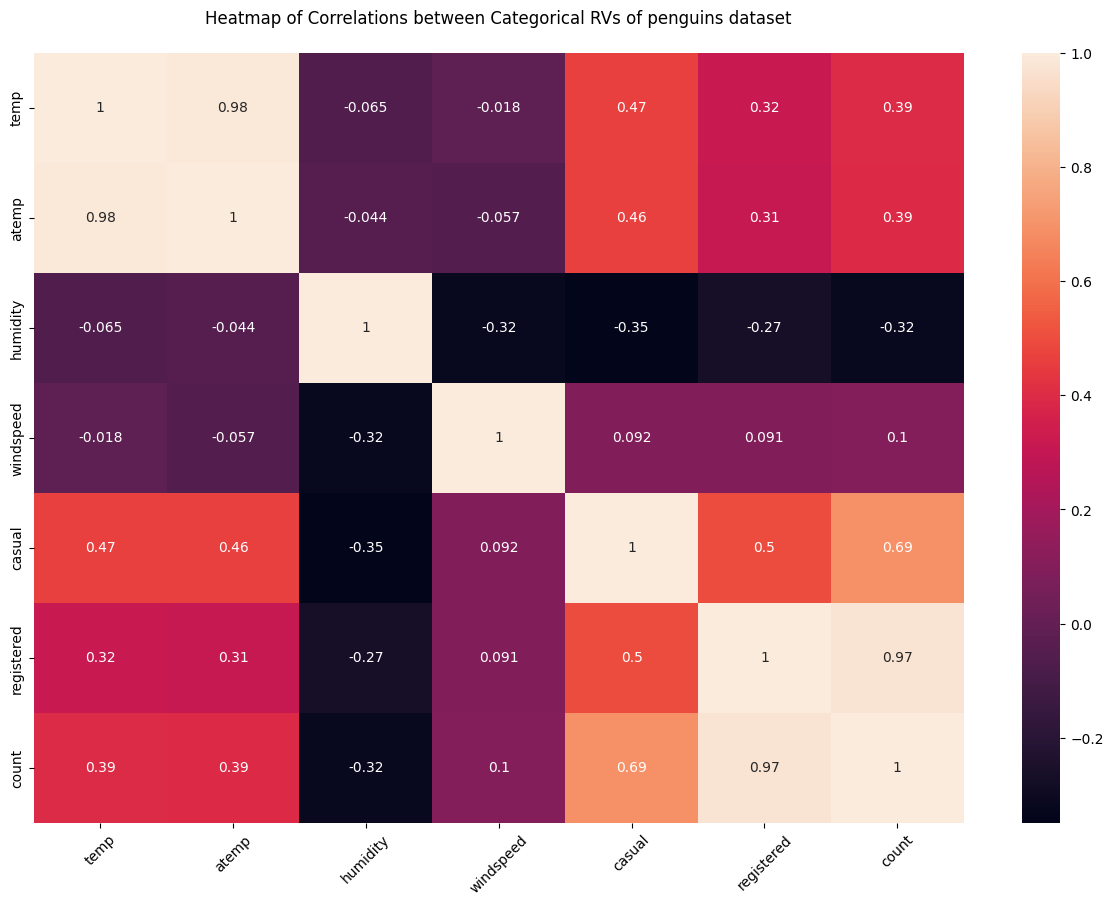

In [ ]:
#Heatmap of Correlation Table
plt.figure(figsize=(15, 10))
plt.title("Heatmap of Correlations between Categorical RVs of penguins dataset\n")
plt.xticks(rotation=45)
sns.heatmap(data=Continous_Vars.corr(), annot=True)
plt.show()

<b><h1>Insights:</h1></b>
<h3>Correlation Heatmap:</h3>


**Atemp:**

- Strong positive correlation with 'temp' (0.98), indicating a close relationship.
- Moderate positive correlation with 'casual' (0.46) and 'registered' (0.31).
- Positive correlation with 'count' (0.39), suggesting a relationship with overall bike rentals.

**Temp (Temperature):**

- Highly correlated with 'atemp' (0.98), indicating a strong connection.
- Moderate positive correlation with 'casual' (0.47) and 'registered' (0.32).
- Positive correlation with 'count' (0.39), showing a relationship with overall bike rentals.

**Humidity:**

- Weak negative correlation with 'atemp' (-0.04) and 'temp' (-0.06).
- Moderate negative correlation with 'casual' (-0.35), 'registered' (-0.27), and 'count' (-0.32).
- Indicates a tendency for fewer bike rentals during higher humidity.

**Windspeed:**

- Weak negative correlation with 'atemp' (-0.06) and 'temp' (-0.02).
- Weak positive correlation with 'casual' (0.09), 'registered' (0.09), and 'count' (0.10).
- Suggests a subtle influence on bike rentals with increasing wind speed.

**Casual (Casual Bike Rentals):**

- Strong positive correlation with 'atemp' (0.46) and 'temp' (0.47).
- Moderate negative correlation with 'humidity' (-0.35) and positive correlation with 'windspeed' (0.09).
- Highly correlated with 'registered' (0.50) and 'count' (0.69), indicating a significant impact on overall rentals.

**Registered (Registered Bike Rentals):**

- Positive correlation with 'atemp' (0.31) and 'temp' (0.32).
- Negative correlation with 'humidity' (-0.27) and positive correlation with 'windspeed' (0.09).
- Highly correlated with 'casual' (0.50) and 'count' (0.97), emphasizing a substantial impact on overall rentals.

**Count (Total Bike Rentals):**

- Positive correlation with 'atemp' (0.39), 'temp' (0.39), and 'casual' (0.69).
- Negative correlation with 'humidity' (-0.32).
- Highly correlated with 'registered' (0.97), emphasizing the joint impact of casual and registered rentals on the overall count.

<br><br><br><h1> Question-3 Check if there any significant difference between the no. of bike rides on Weekda
and Weekends?


In [ ]:
# Hypothesis Testing
np.random.seed(41)
df_subset = df.sample(100)["count"]
test_stat, p_val = shapiro(df_subset)
p_val

2.6341210395843134e-07

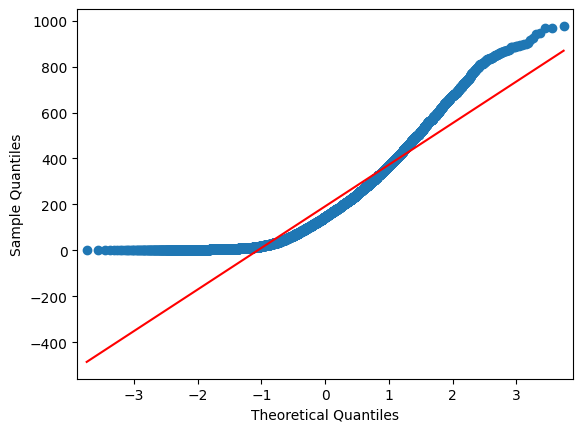

In [ ]:
### QQ Plot analysis
qqplot(df['count'], line = 's')
plt.show()

In [ ]:
working_day = df[df['Workingday'] == 'Weekdays']['count']
holiday = df[df['Workingday'] == 'Weekends']['count']
levene_stat, p_val = levene(working_day, holiday)
p_val

0.9437823280916695

<Axes: xlabel='count', ylabel='Density'>

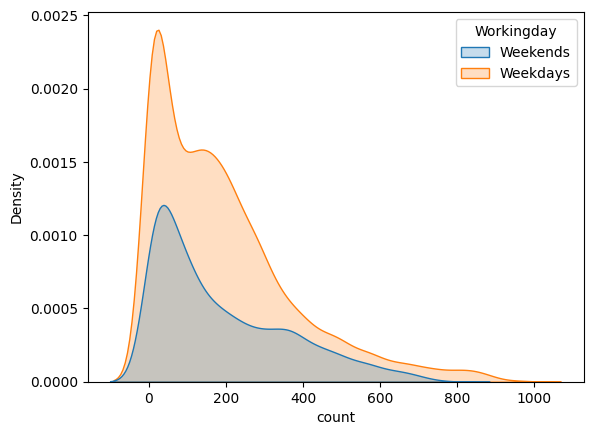

In [ ]:
sns.kdeplot(data = df, x = 'count', hue = 'Workingday', fill=True)

<Axes: xlabel='count', ylabel='Count'>

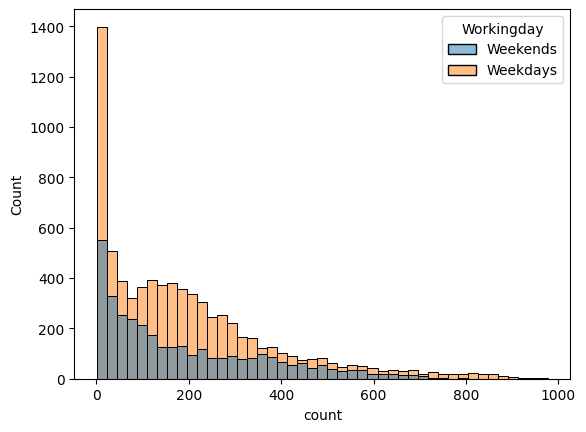

In [ ]:
sns.histplot(data = df, x = 'count', hue = 'Workingday')

<h1>The Hypothesis for the t-test are:<h1>

- **Ho: There is no significant difference between working and non-working days.**<br>
- **Ha: There is a significant difference between working and non-working days.**

In [ ]:
ttest_stat, p_val = ttest_ind(working_day, holiday)
print(f"P-value: {p_val}")
if p_val > 0.05:
    print("P-value is greater than the significance level (0.05). Null hypothesis can be accepted.")
    print("Therefore, there is no significant difference in bike rentals between working and non-working days.")
else:
    print("P-value is less than or equal to the significance level (0.05). Null hypothesis is rejected.")
    print("Therefore, there is a significant difference in bike rentals between working and non-working days.")

P-value: 0.22644804226361348
P-value is greater than the significance level (0.05). Null hypothesis can be accepted.
Therefore, there is no significant difference in bike rentals between working and non-working days.


In [ ]:
kruskal_stat, p_val = kruskal(working_day, holiday)
print(f"P-value: {p_val}")
if p_val > 0.05:
    print("P-value is greater than the significance level (0.05). Null hypothesis can be accepted.")
    print("Therefore, there is no significant difference in bike rentals between working and non-working days.")
else:
    print("P-value is less than or equal to the significance level (0.05). Null hypothesis is rejected.")
    print("Therefore, there is a significant difference in bike rentals between working and non-working days.")

P-value: 0.9679113872727798
P-value is greater than the significance level (0.05). Null hypothesis can be accepted.
Therefore, there is no significant difference in bike rentals between working and non-working days.


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')

Weekdays_data = df[df['Workingday'] == 'Weekdays']['count']
Weekends_data = df[df['Workingday'] == 'Weekends']['count']

print(f"Lenght of WeekDays : {len(Weekdays_data)}\nLenght of Weekends : {len(Weekends_data)}\n")
# Perform a 2-sample independent t-test
t_stat, p_value = ttest_ind(Weekdays_data, Weekends_data, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between weekdays and weekends.")
else:
    print("Fail to reject the null hypothesis: No significant difference between weekdays and weekends.")

Lenght of WeekDays : 7412
Lenght of Weekends : 3474

T-statistic: 1.2362580418223226
P-value: 0.21640312280695098

Fail to reject the null hypothesis: No significant difference between weekdays and weekends.


<h1>Insights:</h1>

<b>Data Split: </b> You are analyzing the count column by splitting the data into two groups:



*   Weekdays: Data where Workingday is labeled as 'Weekdays'.
*   Weekends: Data where Workingday is labeled as 'Weekends'.


This helps in comparing the activity levels on weekdays vs weekends, based on the count column.


<h3>T-test:</h3>
 You are conducting a <b>2-sample independent t-test </b>to compare the means of the two groups (Weekdays_data and Weekends_data). This test will determine if there is a significant difference in the count between weekdays and weekends. The null hypothesis (H₀) is that there is no difference between the two groups, while the alternative hypothesis (H₁) is that there is a significant difference.</br>

<h3>T-statistic and P-value:</h3>


*   <b>T-statistic: </b>Indicates the magnitude of the difference between the sample means relative to the variability within the samples.
*   <b>P-value: </B>The probability that the observed difference (or one more extreme) occurred under the null hypothesis.


<h3>Decision:</h3>You compare the p-value to the significance level (alpha = 0.05) to decide whether to reject or fail to reject the null hypothesis.


*   If p_value < alpha, you reject the null hypothesis, suggesting a significant difference between weekdays and weekends.
*   If p_value ≥ alpha, you fail to reject the null hypothesis, suggesting there is no significant difference.


<h1>Recommendations:</h1>
<h3>Understanding the Results:</h3>

*   If the p-value is less than 0.05, this indicates a <b> Statistically Significant Difference </b> between the weekdays and weekends in terms of the count variable. This could mean that whatever you are measuring in count (sales, activity, etc.) behaves differently on weekdays compared to weekends.
*   If the p-value is greater than 0.05, then there is <b>No Significant Difference </b> meaning weekday and weekend activities are not statistically different for the data you are analyzing.

<h3>Follow-up Action Based on Results:</h3>

*   <b>If there is a significant difference:</b> You could dive deeper into why the count differs between weekdays and weekends. For example, if this data represents sales or usage, you might find that weekends have higher activity levels, indicating a trend for more customer activity on weekends. In this case, you might consider adjusting staffing, promotions, or product availability based on these findings.
*   <b>If there is no significant difference:</b> This might suggest that the factors influencing count are consistent across both weekdays and weekends. In such a case, you might focus on other factors (such as weather, holidays, or promotions) that could explain variations in activity levels. You could also evaluate whether the current data period is representative of typical weekday and weekend activity.

<h3>Further Analysis:</h3>

*   <b>Consider other variables: </b> If count is related to sales, for example, other factors like promotions, holidays, or special events might impact weekdays and weekends differently. Analyzing such factors might provide more insights.
*   <b>Visualizations:</b> Create histograms, boxplots, or bar charts for both weekdays and weekends to better understand the distribution of count. This will allow you to visually assess if the means and variances differ between the two groups.

<h3>Review Assumptions of the T-test:</h3>

*   <b>Equal variance assumption:</b> You have set equal_var=False in the ttest_ind() function, which assumes that the two groups may have unequal variances. You can verify this assumption by performing an F-test to check for equal variances before drawing conclusions.
*   <b>Normality:</b> The t-test assumes that the data is normally distributed. It might be useful to check for normality (using tests like the Shapiro-Wilk test or by visualizing the data with histograms) before conducting the t-test. If the data is not normally distributed, you might consider using non-parametric tests like the Mann-Whitney U test.

<h3>Conclusion:</h3>
The t-test helps determine if the difference between weekdays and weekends in terms of count is statistically significant. Depending on the result, you can decide whether to adjust your strategies based on weekday/weekend patterns or explore other factors influencing the data.

<br><br><br><h1>Question-4 Check if the demand of bicycles on rent is the same for different Weather
conditions?<h1>

In [ ]:
partly_cloudyA = df[df['Weather'] == 'Partly Cloudy']['casual']
misty_or_overcastA = df[df['Weather'] == 'Misty or Overcast']['casual']
light_precipitationA = df[df['Weather'] == 'Light Precipitation']['casual']
stormy_foggyA = df[df['Weather'] == 'Stormy and Foggy']['casual']

stats.f_oneway(partly_cloudyA, misty_or_overcastA, light_precipitationA, stormy_foggyA)

F_onewayResult(statistic=69.01699223934773, pvalue=3.3100209801972467e-44)

In [ ]:
# Skewness of Weather
df.groupby('Weather')['count'].skew()

,count
Weather,
Light Precipitation,2.187137
Misty or Overcast,1.294444
Partly Cloudy,1.139857
Stormy and Foggy,NaN


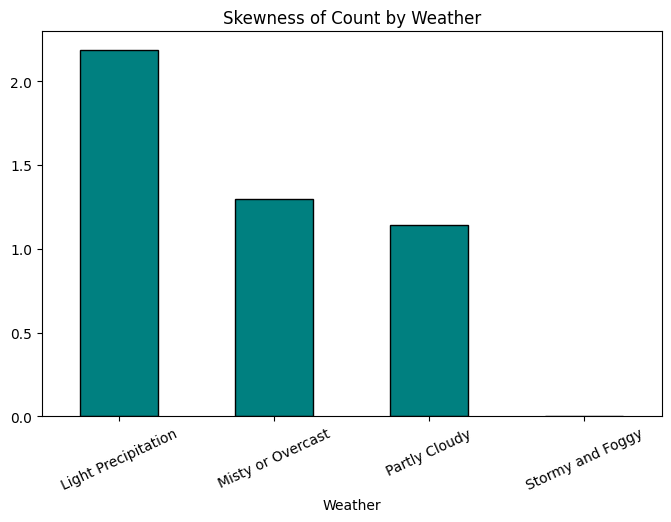

In [ ]:
skewness = df.groupby('Weather')['count'].skew()
plt.figure(figsize=(8, 5))
skewness.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Skewness of Count by Weather')
plt.xticks(rotation=25)
plt.show()

In [ ]:
# Kurtosis Test of Weather
df.groupby('Weather')['count'].apply(lambda x: x.kurtosis())

,count
Weather,
Light Precipitation,6.003054
Misty or Overcast,1.588430
Partly Cloudy,0.964720
Stormy and Foggy,NaN


<ipython-input-170-d7f718aca9c3>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df, x = 'count', hue = 'Weather', fill=True)


<Axes: xlabel='count', ylabel='Density'>

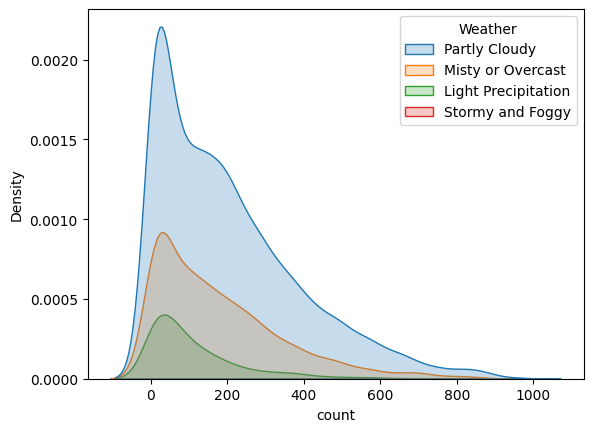

In [ ]:
sns.kdeplot(data = df, x = 'count', hue = 'Weather', fill=True)

<Axes: xlabel='count', ylabel='Count'>

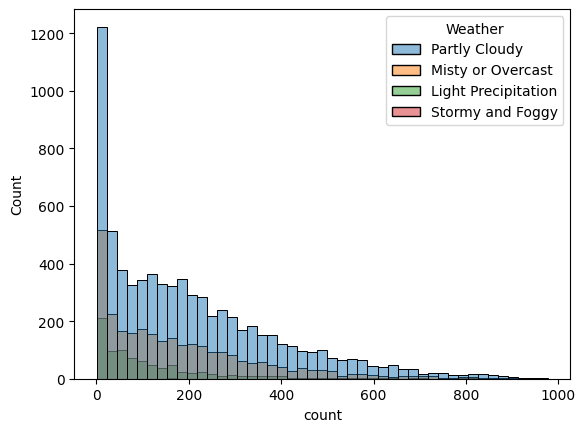

In [ ]:
sns.histplot(data = df, x = 'count', hue = 'Weather')

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Weather'], df['Holiday'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Significant relationship between weather and holiday (Reject H0)")
else:
    print("Result: No significant relationship between weather and holiday (Fail to reject H0)")

Chi-Square Statistic: 5.41, P-value: 0.1443
Result: No significant relationship between weather and holiday (Fail to reject H0)


In [ ]:
casual_count = df[df['casual'] > 0]['count']
registered_count = df[df['registered'] > 0]['count']
f_stat, p_value = f_oneway(casual_count, registered_count)

print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Significant relationship between casual/registered users and bike rentals (Reject H0)")
else:
    print("Result: No significant relationship between casual/registered users and bike rentals (Fail to reject H0)")

F-statistic: 48.69, P-value: 0.0000
Result: Significant relationship between casual/registered users and bike rentals (Reject H0)


In [ ]:
Contingency_Table = pd.crosstab(df['Weather'], df['Season'])
Contingency_Table

Season,Fall,Spring,Summer,Winter
Weather,,,,
Light Precipitation,199,211,224,225
Misty or Overcast,604,715,708,807
Partly Cloudy,1930,1759,1801,1702
Stormy and Foggy,0,1,0,0


In [ ]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=5.406882723976633, pvalue=0.1443153629276037, dof=3, expected_freq=array([[2.45406026e+01, 8.34459397e+02],
       [8.09639904e+01, 2.75303601e+03],
       [2.05466838e+02, 6.98653316e+03],
       [2.85688040e-02, 9.71431196e-01]]))

In [ ]:
weather1 = df[df['Weather'] == 'Partly Cloudy']['count']
weather2 = df[df['Weather'] == 'Misty or Overcast']['count']
weather3 = df[df['Weather'] == 'Light Precipitation']['count']
weather4 = df[df['Weather'] == 'Stormy and Foggy']['count']

levene_stat, p_val = levene(weather1, weather2, weather3, weather4)

print(f"P-value: {p_val}")
if p_val < 0.05:
    print("P-value is smaller than the significance level (0.05). Null hypothesis can be rejected.")
    print("Therefore, the variances are not equal.")
else:
    print("P-value is greater than or equal to the significance level (0.05). Null hypothesis can be accepted.")
    print("Therefore, the variances are equal.")

P-value: 3.504937946833238e-35
P-value is smaller than the significance level (0.05). Null hypothesis can be rejected.
Therefore, the variances are not equal.


In [ ]:
# Kruskal Test on weather
kruskal_stat, p_val = kruskal(weather1, weather2, weather3, weather4)

print(f"P-value: {p_val}")
if p_val < 0.05:
    print("P-value is smaller than the significance level (0.05). Null hypothesis can be rejected.")
    print("Therefore, we can conclude that there is a significant difference between demand of bicycles for different Weather conditions.")
else:
    print("P-value is greater than or equal to the significance level (0.05). Null hypothesis can be accepted.")
    print("Therefore, we can conclude that there is no significant difference between demand of bicycles for different Weather conditions.")

P-value: 3.501611300708679e-44
P-value is smaller than the significance level (0.05). Null hypothesis can be rejected.
Therefore, we can conclude that there is a significant difference between demand of bicycles for different Weather conditions.


In [ ]:
# Analysis of Casual User Count Across Different Weather Conditions
partly_cloudy = df[df['Weather'] == 'Partly Cloudy']['casual']
misty_or_overcast = df[df['Weather'] == 'Misty or Overcast']['casual']
light_precipitation = df[df['Weather'] == 'Light Precipitation']['casual']
stormy_foggy = df[df['Weather'] == 'Stormy and Foggy']['casual']

f_stat, p_value = stats.f_oneway(partly_cloudy, misty_or_overcast, light_precipitation, stormy_foggy)
print("F-statistic:", f_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in rental Casual user count across weather conditions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in rental Casual user count across weather conditions.")

F-statistic: 69.01699223934773
P-value: 3.3100209801972467e-44
Reject the null hypothesis: There is a significant difference in rental Casual user count across weather conditions.


In [ ]:
# Analysis of Registered User Count Across Different Weather Conditions:
partly_cloudy = df[df['Weather'] == 'Partly Cloudy']['registered']
misty_or_overcast = df[df['Weather'] == 'Misty or Overcast']['registered']
light_precipitation = df[df['Weather'] == 'Light Precipitation']['registered']
stormy_foggy = df[df['Weather'] == 'Stormy and Foggy']['registered']

f_stat, p_value = stats.f_oneway(partly_cloudy, misty_or_overcast, light_precipitation, stormy_foggy)
print("F-statistic:", f_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in rental Casual user count across weather conditions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in rental Casual user count across weather conditions.")

F-statistic: 48.93397612585586
P-value: 2.0932747272621856e-31
Reject the null hypothesis: There is a significant difference in rental Casual user count across weather conditions.


In [ ]:
# Analysis of Total User Count Across Different Weather Conditions:
partly_cloudy = df[df['Weather'] == 'Partly Cloudy']['count']
misty_or_overcast = df[df['Weather'] == 'Misty or Overcast']['count']
light_precipitation = df[df['Weather'] == 'Light Precipitation']['count']
stormy_foggy = df[df['Weather'] == 'Stormy and Foggy']['count']

f_stat, p_value = stats.f_oneway(partly_cloudy, misty_or_overcast, light_precipitation, stormy_foggy)
print("F-statistic:", f_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in rental Casual user count across weather conditions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in rental Casual user count across weather conditions.")

F-statistic: 65.53024112793271
P-value: 5.482069475935669e-42
Reject the null hypothesis: There is a significant difference in rental Casual user count across weather conditions.


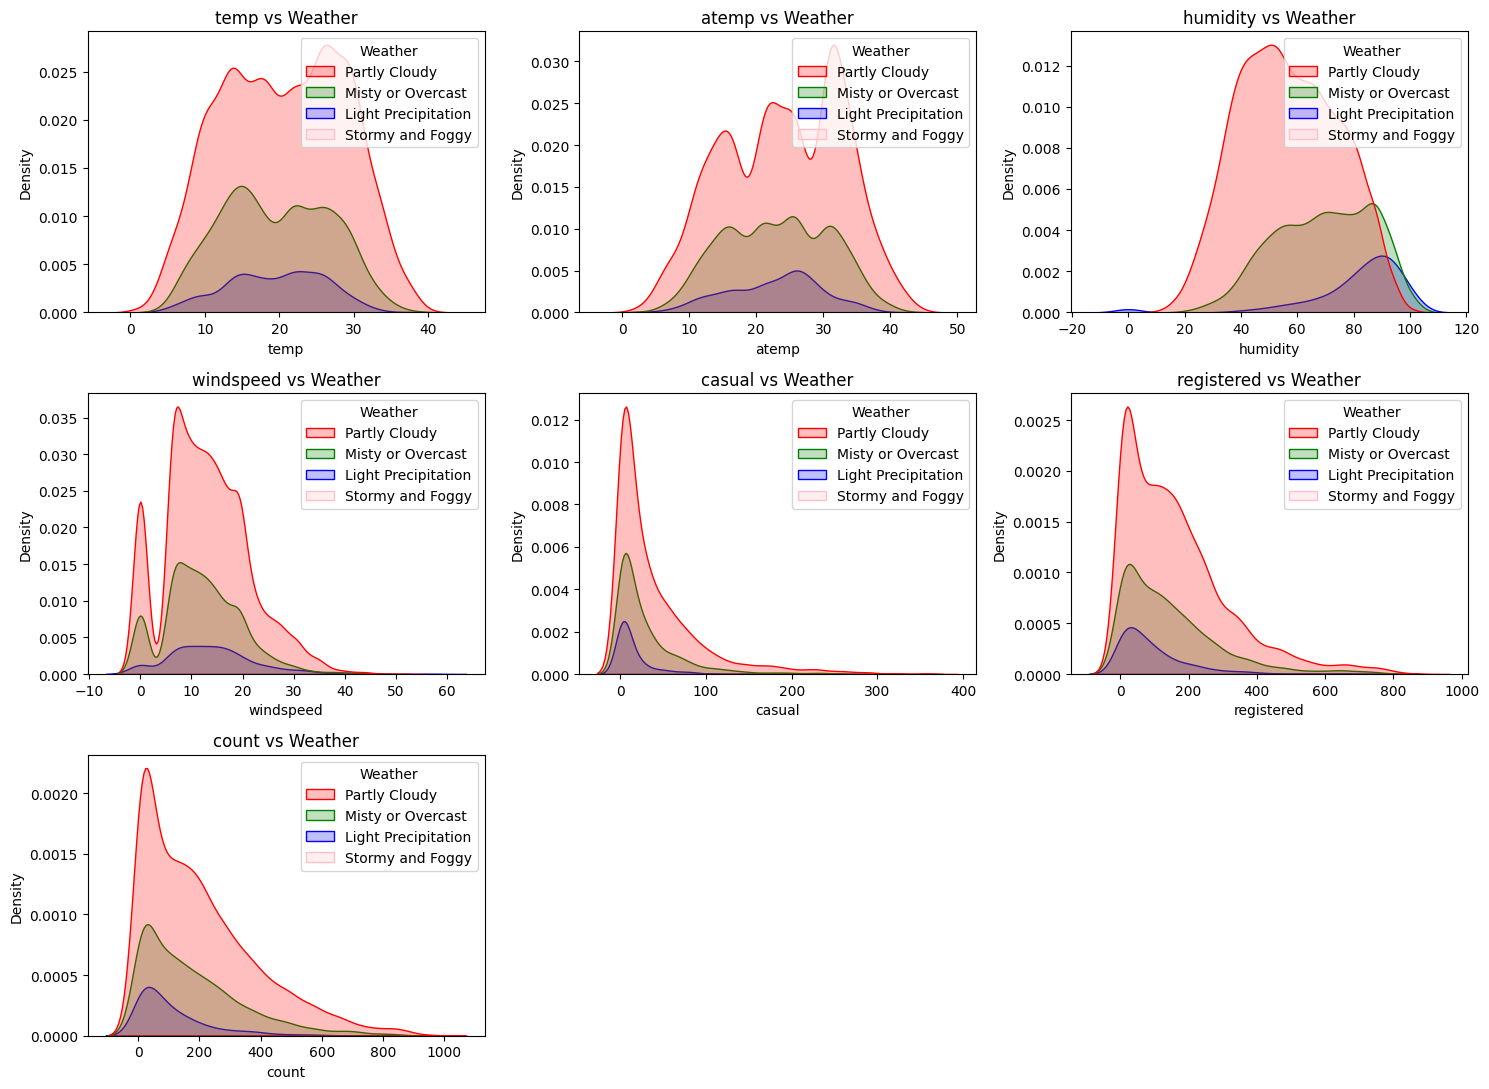

In [ ]:
season_var = 'Weather'
numeric_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(15, 11))
for i, num_var in enumerate(numeric_vars, 1):
    plt.subplot(3, 3, i)

    for season in df[season_var].unique():
        subset = df[df[season_var] == season][num_var]
        if subset.var() == 0 or subset.empty:
            continue
    sns.kdeplot(data=df, x=num_var, hue=season_var,
        palette={'Partly Cloudy': 'red', 'Misty or Overcast': 'green',
                 'Light Precipitation': 'blue', 'Stormy and Foggy': 'pink'},
        fill=True, warn_singular=False)
    plt.title(f'{num_var} vs {season_var}')
    plt.xlabel(num_var)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

<h1>Insights from the Analysis</h1>
<h3>F-statistic:</h3>

- The F-statistic value is 65.53, which is quite high. This suggests that there is a significant difference between the groups (weather conditions) in terms of the rental user count.
- The F-statistic is a ratio of variances, and a higher value indicates that the means of the groups are more different from each other compared to the variance within each group.

<h3>P-value:</h3>

- The p-value is 5.48e-42, which is extremely small (far less than the significance level of 0.05).
- Since the p-value is much smaller than the alpha (0.05), we reject the null hypothesis. This means there is strong statistical evidence that the rental user count significantly differs across weather conditions.

<h3>Conclusion:</h3>

- We conclude that the weather conditions (Partly Cloudy, Misty or Overcast, Light Precipitation, Stormy and Foggy) have a significant impact on the rental user count. In other words, the number of users renting bicycles is affected by the type of weather condition.

<h1>Recommendations Based on Findings</h1>
<h3>Weather-based Marketing Strategies:</h3>

- Tailored Marketing: Since there is a significant difference in the rental user count across different weather conditions, businesses should tailor their marketing strategies based on the weather forecast. For example:
- Stormy/Foggy Weather: Since the demand might decrease in stormy or foggy weather, you can run promotional offers to increase rentals during these times.
- Partly Cloudy or Light Precipitation: These weather conditions might attract more users. You can increase marketing efforts or offer loyalty rewards to encourage users to rent more during such weather.

<h3>Demand Forecasting and Inventory Management:</h3>

-m Weather-Specific Planning: Since demand fluctuates with weather, businesses can forecast demand based on weather patterns and prepare their resources (bicycles, staff, etc.) accordingly. For example, on days with expected light precipitation or partly cloudy weather, ensure more bikes are available for rentals.
- Dynamic Pricing: Businesses can implement dynamic pricing where the cost of rentals varies depending on weather conditions. For instance, offering discounts on foggy or stormy days could attract more customers.

<h3>Improved Operational Efficiency:</h3>

- Optimize Inventory Distribution: For weather conditions like partly cloudy or light precipitation, when the demand is high, ensure that bike stations are well-stocked in those areas.
- Weather-Responsive Staffing: Adjust staffing levels based on demand. For instance, higher demand on partly cloudy days would require more staff, while lower demand on stormy or foggy days might allow for reduced staffing.

<h3>Summary:</h3>

- Significant Difference: The rental count varies significantly depending on the weather, which indicates that weather conditions should be a key factor in planning and operational strategies for bicycle rental businesses.
- Actionable Insights: Utilize this knowledge for better resource management, targeted marketing, and optimizing business operations based on weather predictions.


<br><br><br><h1>Question-5 Check if the demand of bicycles on rent is the same for different Seasons?<h1>

<h2>(a) Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)</h2>

- Null Hypothesis (H0):
The demand for bicycles on rent is the same across different seasons.

𝐻
0
:
𝜇
𝐹
𝑎
𝑙
𝑙
=
𝜇
𝑆
𝑝
𝑟
𝑖
𝑛
𝑔
=
𝜇
𝑆
𝑢
𝑚
𝑚
𝑒
𝑟
=
𝜇
𝑊
𝑖
𝑛
𝑡
𝑒
𝑟
H
0
​
 :μ
Fall
​
 =μ
Spring
​
 =μ
Summer
​
 =μ
Winter
​

- Alternate Hypothesis (H1):
The demand for bicycles on rent is not the same across different seasons.

𝐻
1
:
At least one season has a different mean demand.
H
1
​
 :At least one season has a different mean demand.

<h2>(b) Select an appropriate test</h2>

The appropriate test is the One-Way ANOVA Test because:

- It compares the means of more than two groups (here, four seasons).
- Assumes the data is continuous and follows a normal distribution.

In [ ]:
Season_Spring = df[df["Season"] == "Spring"]["count"]
Season_Summer = df[df["Season"] == "Summer"]["count"]
Season_Fall = df[df["Season"] == "Fall"]["count"]
Season_Winter = df[df["Season"] == "Winter"]["count"]

stats.f_oneway(Season_Spring, Season_Summer, Season_Fall, Season_Winter)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

In [ ]:
# Skewness of Weather
df.groupby('Season')['count'].skew()

,count
Season,
Fall,0.991495
Spring,1.888056
Summer,1.003264
Winter,1.172117


<h2> Skewness and Kurtosis</h2>

- Inspect skewness and kurtosis values to assess deviation from normality.

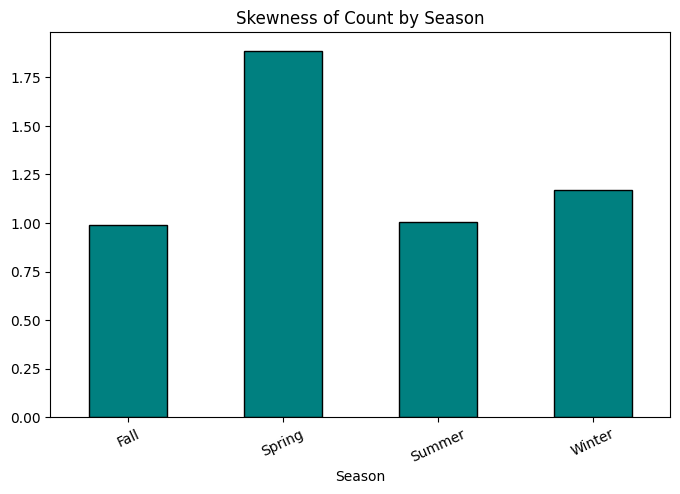

In [ ]:
skewness = df.groupby('Season')['count'].skew()
plt.figure(figsize=(8, 5))
skewness.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Skewness of Count by Season')
plt.xticks(rotation=25)
plt.show()

In [ ]:
# Kurtosis Test of Season
df.groupby('Season')['count'].apply(lambda x: x.kurtosis())

,count
Season,
Fall,0.699383
Spring,4.314757
Summer,0.425213
Winter,1.273485


<Axes: title={'center': 'Season vs Total Users'}, xlabel='count', ylabel='Density'>

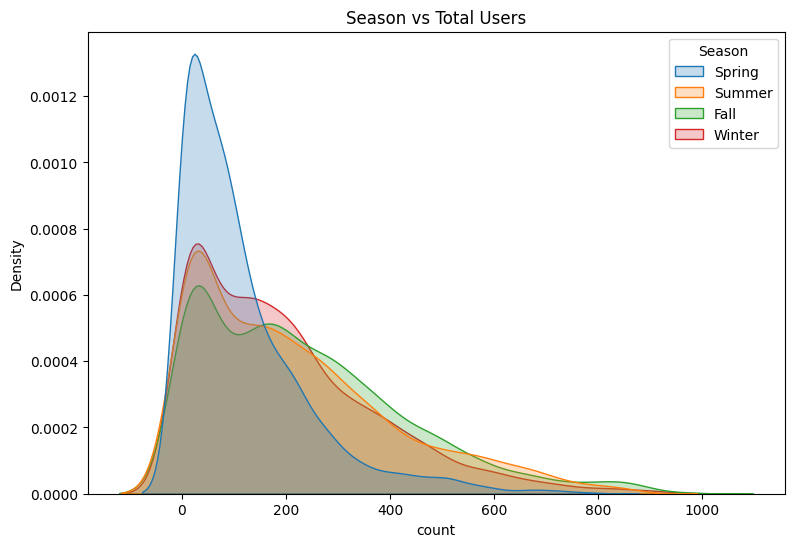

In [ ]:
plt.figure(figsize=(9, 6))
plt.title("Season vs Total Users")
sns.kdeplot(data = df, x = 'count', hue = 'Season', fill=True)

<Axes: xlabel='count', ylabel='Count'>

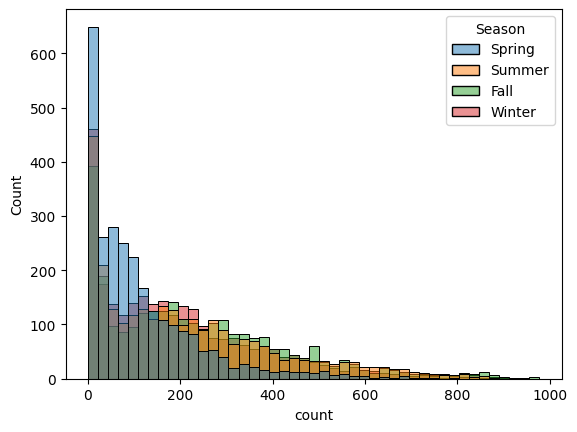

In [ ]:
sns.histplot(data = df, x = 'count', hue = 'Season')

<h2> Equality of Variance Test (Levene’s Test)</h2>

 - Test if the variance in demand is equal across seasons using Levene’s Test.

In [ ]:
Season_A = df[df['Season'] == 'Spring']['count']
Season_B = df[df['Season'] == 'Summer']['count']
Season_C = df[df['Season'] == 'Fall']['count']
Season_D = df[df['Season'] == 'Winter']['count']

levene_stat, p_val = levene(Season_A, Season_B, Season_C, Season_D)

print(f"P-value: {p_val}")
if p_val < 0.05:
    print("P-value is smaller than the significance level (0.05). Null hypothesis can be rejected.")
    print("Therefore, the variances are not equal.")
else:
    print("P-value is greater than or equal to the significance level (0.05). Null hypothesis can be accepted.")
    print("Therefore, the variances are equal.")



P-value: 1.0147116860043298e-118
P-value is smaller than the significance level (0.05). Null hypothesis can be rejected.
Therefore, the variances are not equal.


In [ ]:
kruskal_stat, p_val = kruskal(Season_A, Season_B, Season_C, Season_D)
print(f"P-value: {p_val}")
if p_val < 0.05:
    print("P-value is smaller than the significance level (0.05). Null hypothesis can be rejected.")
    print("Therefore, we can conclude that there is a significant difference between demand of bicycles for different Season conditions.")
else:
    print("P-value is greater than or equal to the significance level (0.05). Null hypothesis can be accepted.")
    print("Therefore, we can conclude that there is no significant difference between demand of bicycles for different Season conditions.")

P-value: 2.479008372608633e-151
P-value is smaller than the significance level (0.05). Null hypothesis can be rejected.
Therefore, we can conclude that there is a significant difference between demand of bicycles for different Season conditions.


<h2> Set significance level and Calculate test statistics / p-value</h2>

- Set significance level <br>(
𝛼
α):
Use
𝛼
=
 0.05
α=0.05 (5%).
- Perform One-Way ANOVA Test:

<h2> Decide whether to accept or reject the Null Hypothesis</h2>

- If p-value ≤ 0.05:
Reject the Null Hypothesis
𝐻
0
H
0
​
 . This means the demand for bicycles is significantly different across seasons.

- If p-value > 0.05:
Fail to reject the Null Hypothesis
𝐻
0
H
0
​
 . This means there is no significant difference in demand across seasons.

In [ ]:
# Analysis of Casual User Across Different Season Conditions
Season_Spring_A = df[df['Season'] == 'Spring']['casual']
Season_Summer_A = df[df['Season'] == 'Summer']['casual']
Season_Fall_A = df[df['Season'] == 'Fall']['casual']
Season_Winter_A = df[df['Season'] == 'Winter']['casual']

f_stat, p_value = stats.f_oneway(Season_Spring_A, Season_Summer_A, Season_Fall_A, Season_Winter_A)
print("F-statistic:", f_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in rental Casual user count across Season conditions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in rental Casual user count across Season conditions.")

F-statistic: 344.6605621917358
P-value: 7.937798855774506e-214
Reject the null hypothesis: There is a significant difference in rental Casual user count across Season conditions.


In [ ]:
# Analysis of Registered User Across Different Season Conditions:
Season_Spring_A = df[df['Season'] == 'Spring']['registered']
Season_Summer_A = df[df['Season'] == 'Summer']['registered']
Season_Fall_A = df[df['Season'] == 'Fall']['registered']
Season_Winter_A = df[df['Season'] == 'Winter']['registered']

f_stat, p_value = stats.f_oneway(Season_Spring_A, Season_Summer_A, Season_Fall_A, Season_Winter_A)
print("F-statistic:", f_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in rental Casual user count across Season conditions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in rental Casual user count across Season conditions.")

F-statistic: 167.97539126005708
P-value: 1.8882994650328087e-106
Reject the null hypothesis: There is a significant difference in rental Casual user count across Season conditions.


In [ ]:
# Analysis of Registered User Across Different Season Conditions:
Season_Spring_A = df[df['Season'] == 'Spring']['count']
Season_Summer_A = df[df['Season'] == 'Summer']['count']
Season_Fall_A = df[df['Season'] == 'Fall']['count']
Season_Winter_A = df[df['Season'] == 'Winter']['count']

f_stat, p_value = stats.f_oneway(Season_Spring_A, Season_Summer_A, Season_Fall_A, Season_Winter_A)
print("F-statistic:", f_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in rental Casual user count across Season conditions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in rental Casual user count across Season conditions.")

F-statistic: 236.94671081032106
P-value: 6.164843386499654e-149
Reject the null hypothesis: There is a significant difference in rental Casual user count across Season conditions.


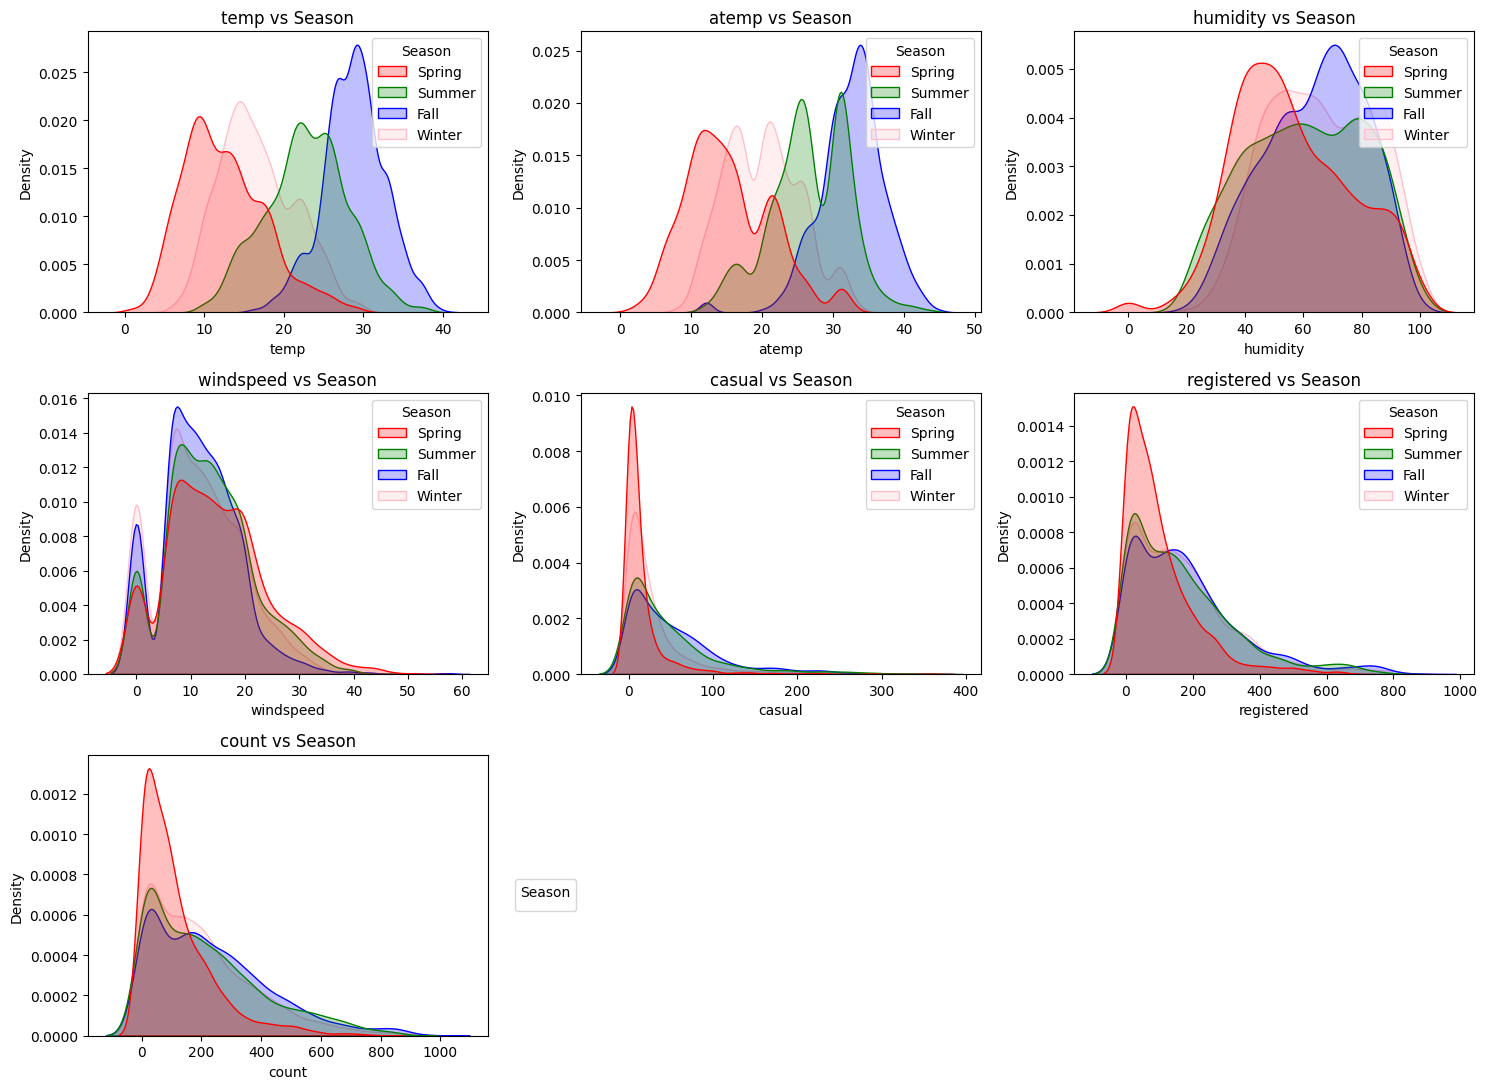

In [ ]:
season_var = 'Season'
numeric_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
plt.figure(figsize=(15, 11))
for i, num_var in enumerate(numeric_vars, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df, x=num_var, hue=season_var, palette={'Spring': 'red', 'Summer': 'green', 'Fall': 'blue', 'Winter': 'pink'}, fill=True)
    plt.title(f'{num_var} vs {season_var}')
    plt.xlabel(num_var)
    plt.ylabel('Density')
plt.tight_layout()
plt.legend(title='Season', loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.show()

In [ ]:
# Categorical values for Season
Spring_Temp = df[df["Season"] == "Spring"]["temp"]
Summer_Temp = df[df["Season"] == "Summer"]["temp"]
Fall_Temp = df[df["Season"] == "Fall"]["temp"]
Winter_Temp = df[df["Season"] == "Winter"]["temp"]

numeric_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
for num_var in numeric_vars:
    print(f"Temperature vs Season for {num_var}:")

    # Filter data for the current numeric variable for each season
    Spring_Var = df[df["Season"] == "Spring"][num_var]
    Summer_Var = df[df["Season"] == "Summer"][num_var]
    Fall_Var = df[df["Season"] == "Fall"][num_var]
    Winter_Var = df[df["Season"] == "Winter"][num_var]

    # Perform One-Way ANOVA
    f_stat, p_value = stats.f_oneway(Spring_Var, Summer_Var, Fall_Var, Winter_Var)
    print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Result: Significant relationship between Season and", num_var, "(Reject H0)\n")
    else:
        print("Result: No significant relationship between Season and", num_var, "(Fail to reject H0)\n")


Temperature vs Season for temp:
F-statistic: 6040.69, P-value: 0.0000
Result: Significant relationship between Season and temp (Reject H0)

Temperature vs Season for atemp:
F-statistic: 5361.83, P-value: 0.0000
Result: Significant relationship between Season and atemp (Reject H0)

Temperature vs Season for humidity:
F-statistic: 140.90, P-value: 0.0000
Result: Significant relationship between Season and humidity (Reject H0)

Temperature vs Season for windspeed:
F-statistic: 92.61, P-value: 0.0000
Result: Significant relationship between Season and windspeed (Reject H0)

Temperature vs Season for casual:
F-statistic: 344.66, P-value: 0.0000
Result: Significant relationship between Season and casual (Reject H0)

Temperature vs Season for registered:
F-statistic: 167.98, P-value: 0.0000
Result: Significant relationship between Season and registered (Reject H0)



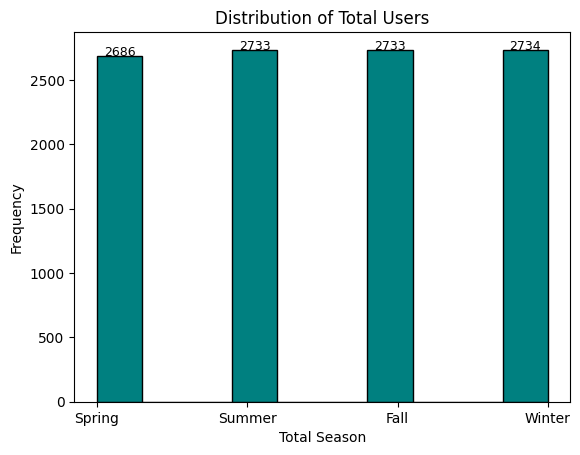

In [ ]:
counts, bins, patches = plt.hist(df['Season'], bins=10, color='teal', edgecolor='black')
for count, patch in zip(counts, patches):
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2,
                 height + 0.2,
                 str(int(height)),
                 ha='center', fontsize=9)
plt.title('Distribution of Total Users')
plt.xlabel('Total Season')
plt.ylabel('Frequency')
plt.show()

<h2>(c) Check assumptions of the test</h2>

-  Normality Test

  - Visual Checks: Use a Histogram and a Q-Q Plot to inspect the normality of demand data for each season.
  - Statistical Test: Perform Shapiro-Wilk’s Test for normality.

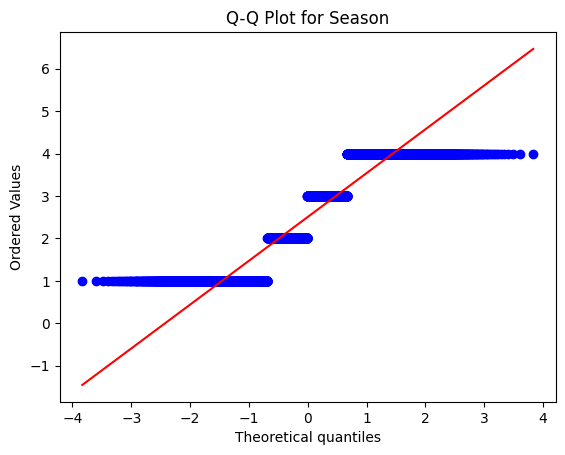

In [ ]:
# 2) Q-Q Plot
stats.probplot(df['season'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Season')
plt.show()

In [ ]:
# (c) Shapiro-Wilk Test
# Shapiro-Wilk Test se normality check:
sample = df['season'].sample(n=5000, random_state=42)
shapiro_test = stats.shapiro(sample)
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

Shapiro-Wilk Test Statistic: 0.8563072979323918
p-value: 1.663169604730426e-55


In [ ]:
# 3: Equality of Variances (Levene's Test)
grouped_data = [df[df['Season'] == season]['count'] for season in df['Season'].unique()]
levene_test = stats.levene(*grouped_data)
print("Levene's Test Statistic:", levene_test.statistic)
print("p-value:", levene_test.pvalue)

Levene's Test Statistic: 187.7706624026276
p-value: 1.0147116860043298e-118


In [ ]:
# 4: One-Way ANOVA Test
anova_test = stats.f_oneway(*grouped_data)
print("ANOVA Test Statistic:", anova_test.statistic)
print("p-value:", anova_test.pvalue)

ANOVA Test Statistic: 236.94671081032106
p-value: 6.164843386499654e-149


In [ ]:
# Testing for Numerical Variables
Continue_Var = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
for col in Continue_Var:
  corr, p_value = pearsonr(df[col], df['count'])
  print(f"Variable: {col}")
  print(f"Correlation: {corr:.2f}, P-value: {p_value:.4f}")
  if p_value < 0.05:
      print(f"Result: Significant relationship with count (Reject H0)\n")
  else:
      print(f"Result: No significant relationship with count (Fail to reject H0)\n")

Variable: temp
Correlation: 0.39, P-value: 0.0000
Result: Significant relationship with count (Reject H0)

Variable: atemp
Correlation: 0.39, P-value: 0.0000
Result: Significant relationship with count (Reject H0)

Variable: humidity
Correlation: -0.32, P-value: 0.0000
Result: Significant relationship with count (Reject H0)

Variable: windspeed
Correlation: 0.10, P-value: 0.0000
Result: Significant relationship with count (Reject H0)

Variable: casual
Correlation: 0.69, P-value: 0.0000
Result: Significant relationship with count (Reject H0)

Variable: registered
Correlation: 0.97, P-value: 0.0000
Result: Significant relationship with count (Reject H0)

Variable: count
Correlation: 1.00, P-value: 0.0000
Result: Significant relationship with count (Reject H0)



In [ ]:
# Chi-Square Test for Independence
# Create a contingency table
contingency_table = pd.crosstab(df['Season'], df['Holiday'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Significant relationship between Season and holiday (Reject H0)")
else:
    print("Result: No significant relationship between Season and holiday (Fail to reject H0)")

Chi-Square Statistic: 20.82, P-value: 0.0001
Result: Significant relationship between Season and holiday (Reject H0)


In [ ]:
casual_count = df[df['casual'] > 0]['count']
registered_count = df[df['registered'] > 0]['count']
f_stat, p_value = f_oneway(casual_count, registered_count)

print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Significant relationship between casual/registered users and bike rentals (Reject H0)")
else:
    print("Result: No significant relationship between casual/registered users and bike rentals (Fail to reject H0)")

F-statistic: 48.69, P-value: 0.0000
Result: Significant relationship between casual/registered users and bike rentals (Reject H0)


### Analysis of Weather Conditions Across Seasons using Chi-square Test

- The hypothesis for the chi-square test are:<br>
- Ho: Season and Weather are independent of each other.<br>
- Ha: Season and Weather are dependent on each other.

In [ ]:
Contingency_Table = pd.crosstab(df['Season'], df['Weather'])
Contingency_Table

Weather,Light Precipitation,Misty or Overcast,Partly Cloudy,Stormy and Foggy
Season,,,,
Fall,199,604,1930,0
Spring,211,715,1759,1
Summer,224,708,1801,0
Winter,225,807,1702,0


In [ ]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=20.82338817816167, pvalue=0.00011455163312609901, dof=3, expected_freq=array([[  78.07854125, 2654.92145875],
       [  76.73580746, 2609.26419254],
       [  78.07854125, 2654.92145875],
       [  78.10711005, 2655.89288995]]))

<h1>1. Seasonal Variation in Bike Rentals:</h1>

- ANOVA Test: The F-statistic and p-value from the one-way ANOVA tests indicate that there is a significant difference in the demand for bikes across different seasons. The p-values are very small (much less than 0.05), which means that the demand for bikes varies significantly between seasons.
- Insight: Demand for bike rentals is not uniform across the year and is highly dependent on the season. For instance, there may be more rentals during Spring and Summer, while Winter could see fewer rentals.
- Recommendation: The bike rental service should consider adjusting their inventory and marketing strategies based on the season. For instance, they could increase availability and promotions during high-demand seasons like Spring and Summer, while possibly offering discounts or reducing inventory during Winter.

<h1>2. Casual vs Registered Users:</h1>
- F-statistic: The F-statistic for casual and registered users across different seasons also indicates that there is a significant difference in the number of casual and registered users.
- Insight: Casual users seem to have a higher variation across seasons, whereas registered users might represent more stable usage patterns.
- Recommendation: Targeted campaigns for casual users can be developed for the peak seasons to convert them into registered users. For instance, offering discounts or loyalty rewards for casual users during Spring and Summer might encourage them to register.

<h1>3. Normality & Variance:</h1>

- Shapiro-Wilk Test: The Shapiro-Wilk test for normality indicates that the data does not follow a normal distribution, as the p-value is very low.
Levene’s Test: The result from Levene's test suggests that the variances are not equal across different seasons, meaning the spread of bike rentals differs from season to season.
- Insight: Since the data is not normally distributed and the variances are unequal, parametric tests (like ANOVA) may not always be the best approach. Non-parametric methods, like the Kruskal-Wallis test, can provide more reliable results.
- Recommendation: Consider using non-parametric methods like Kruskal-Wallis or bootstrapping for analyzing seasonality, as they don't assume normality. Additionally, adjustments for unequal variances may be necessary when planning for resource allocation.

<h1>4. Correlation with Bike Rentals:</h1>

- Pearson Correlation: The correlation analysis shows a strong positive correlation between registered users and total bike count (0.97), which is expected since registered users are more likely to rent bikes frequently.
- Insight: Registered users play a crucial role in the overall rental count, and factors like temperature, humidity, and wind speed also correlate with bike rentals.
- Recommendation: Weather conditions like temperature and humidity can be leveraged in promotional strategies. For example, targeting users with personalized notifications during favorable weather conditions (e.g., warm temperatures) could boost rentals.

<h1>5. Chi-Square Test for Season and Holiday:</h1>

- Chi-Square Test: The test suggests that there is a significant relationship between Season and Holiday, indicating that holidays likely influence bike rental demand.
- Insight: Holidays may cause spikes in bike rentals in specific seasons. This trend should be considered when forecasting demand and allocating resources.
- Recommendation: The service should track holidays more closely and plan special offers or increased availability during peak holiday periods, especially in seasons like Spring and Summer when demand is higher.

<h1>6. Casual vs Registered Users Rental Count:</h1>

- F-statistic: The F-statistic for casual vs registered users indicates a significant relationship between casual/registered users and bike rentals, with casual users showing a stronger correlation with rentals.
- Insight: Casual users are more sensitive to seasonal changes, so their demand fluctuates more. In contrast, registered users provide more stable, consistent rentals.
- Recommendation: The company should focus on retaining casual users during seasonal peaks while maintaining the loyalty of registered users year-round. Offering seasonal promotions, like a free ride or discount during a user's first casual rental, could convert more casual users into registered users.

<h1>7. Key Takeaways for Strategy:</h1>

- Inventory Management: Adjust bike inventory based on seasonal demand. Increase availability during Spring/Summer, and reduce inventory or offer off-season deals during Winter.
- User Retention: Use targeted marketing to convert casual users into registered users, focusing on the benefits of registration such as discounts and loyalty points.
- Weather-Based Promotions: Given the significant correlation between weather conditions and bike rental demand, weather-based promotions can be an effective strategy to boost rentals.
- Holiday Planning: Anticipate higher rental demand around holidays, particularly in peak seasons, and ensure sufficient bike availability and support.

In summary, the statistical tests suggest that seasonal changes, user registration status, and weather conditions significantly impact bike rentals. By leveraging these insights, bike rental services can tailor their strategies for improved customer engagement and operational efficiency.

<br><br><br><h1>Question-6  Check if the Weather conditions are significantly different during different Seasons ?

<h2>(a) Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)</h2>

- Null Hypothesis (H0):
There is no significant relationship between Weather and Season. (They are independent.)

- Alternate Hypothesis (H1):
There is a significant relationship between Weather and Season. (They are dependent.)

<h2>(b) Select an appropriate test</h2>

- Appropriate Test:<br>
The Chi-Square Test of Independence is suitable here because:
  - Both Weather and Season are categorical variables.
  - The test evaluates if there is a relationship between these two variables.

<h2>(c) Create a Contingency Table for Weather & Season</h2>

- A contingency table summarizes the frequency of occurrences of Weather for each Season.

In [ ]:
Contingency_Table = pd.crosstab(df['Season'], df['Weather'])
Contingency_Table

Weather,Light Precipitation,Misty or Overcast,Partly Cloudy,Stormy and Foggy
Season,,,,
Fall,199,604,1930,0
Spring,211,715,1759,1
Summer,224,708,1801,0
Winter,225,807,1702,0


In [ ]:
chi2_contingency(Contingency_Table)

Chi2ContingencyResult(statistic=49.158655596893624, pvalue=1.549925073686492e-07, dof=9, expected_freq=array([[2.15657450e+02, 7.11493845e+02, 1.80559765e+03, 2.51056403e-01],
       [2.11948742e+02, 6.99258130e+02, 1.77454639e+03, 2.46738931e-01],
       [2.15657450e+02, 7.11493845e+02, 1.80559765e+03, 2.51056403e-01],
       [2.15736359e+02, 7.11754180e+02, 1.80625831e+03, 2.51148264e-01]]))

<h2>(d) Set a significance level and Calculate test Statistics / p-value</h2>

- Significance Level:
Set
𝛼
=

 0.05
α=0.05 (5%), which is a common threshold for statistical tests.

- Perform Chi-Square Test:

  Calculate the Chi-Square statistic (
𝜒
2
χ
2
 ) and the p-value.

In [ ]:
chi2_stat, p_value, dof, expected = chi2_contingency(Contingency_Table)
print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_value)
alpha = 0.05
if p_value <= alpha:
    print("Reject Null Hypothesis: There is a significant relationship between Weather and Season.")
else:
    print("Fail to Reject Null Hypothesis: No significant relationship between Weather and Season.")

Chi-Square Statistic: 49.158655596893624
p-value: 1.549925073686492e-07
Reject Null Hypothesis: There is a significant relationship between Weather and Season.


<h1>Insights from the Analysis</h1>

- <b>Chi-Square Statistic:</b> The Chi-Square value is 49.16, which indicates a substantial deviation from independence between the variables.

- <b>p-value: </b>The p-value is 1.55 × 10⁻⁷, which is significantly smaller than the significance level
𝛼
=
0.05
α=0.05. This provides strong evidence to reject the Null Hypothesis.

- <b>Conclusion:</b>

  - There is a significant relationship between Weather and Season.
  - Specific weather conditions are not uniformly distributed across the seasons. For instance:
   - <b>Misty or Overcast</b> conditions are more frequent in Winter (807 occurrences).
   - <b>Partly Cloudy conditions</b> are most common in Fall (1930 occurrences).
   - <b>Stormy and Foggy weather</b> is very rare, occurring only once in Spring.

<h1>Recommendations</h1>
<h2>Seasonal Planning:</h2>

- Organizations or services impacted by weather (e.g., transport, tourism, agriculture) should prepare for the likelihood of certain weather conditions in specific seasons.
  - E.g., Winter services should plan for Misty or Overcast conditions.
  - Fall activities can take advantage of Partly Cloudy weather.

<h2>Weather-Specific Resource Allocation:</h2>

- Allocate resources such as de-icing trucks, fog lights, or other weather-related equipment based on seasonal patterns.
  - Focus fog mitigation resources in Spring due to Stormy and Foggy instances.

<h2>Improved Forecasting:</h2>

- Use historical patterns for better weather prediction models tailored to each season.

<h2>Awareness Campaigns:</h2>

- Educate the public about the likelihood of specific weather conditions in each season to improve safety and preparedness.
  - For example, highlight Misty conditions in Winter for drivers.

<h2>Sector-Specific Insights:</h2>

- Tourism: Promote outdoor activities during seasons with favorable weather (e.g., Partly Cloudy in Fall).
- Retail: Stock weather-related products seasonally (e.g., rain gear in Spring).

These insights can help stakeholders make informed decisions to optimize operations and improve safety and efficiency year-round.